In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

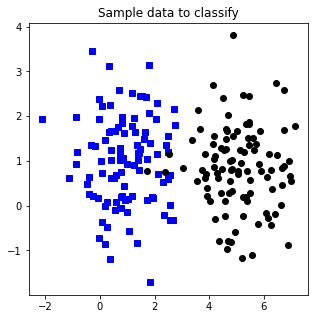

In [3]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Sample data to classify')
plt.show()

In [4]:
def create_model(learningRate):

  
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),  
      # nn.ReLU(),       
      nn.Linear(16,1),  
      # nn.ReLU(),        
      nn.Linear(1,1),   
      nn.Sigmoid(),     
        )

  
  # lossfun = nn.BCEWithLogitsLoss()
  lossfun = nn.BCELoss()
  
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
#   optimizer = torch.optim.Adam(ANNclassify.parameters(),lr=learningRate)

  
  return ANNclassify,lossfun,optimizer

In [5]:
epochs = 100

def train_model(model):
    losses = torch.zeros(epochs)

    for epoch in range(epochs):
        y_pred = model(data)

        loss = lossfun(y_pred,labels)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward prep
    predictions = model(data)
    # or .5 with sigmoid 
    totalacc = 100*torch.mean(((predictions>.0) == labels).float())

    return losses,predictions,totalacc

Final accuracy: 50%


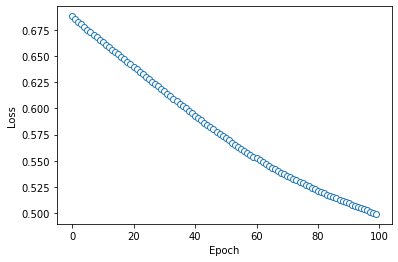

In [6]:
ANNclassify,lossfun,optimizer = create_model(.01)


losses,predictions,totalacc = train_model(ANNclassify)


print('Final accuracy: %g%%' %totalacc)



plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

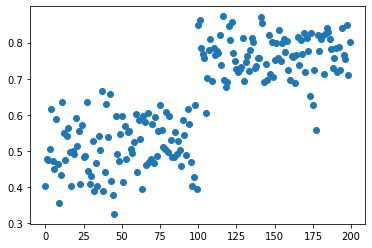

In [7]:
plt.plot(predictions.detach(),'o')

In [8]:
learning_rates = np.linspace(.001,.1,50)

acc_by_lr = np.zeros(len(learning_rates))
allLosses = np.zeros((len(learning_rates),epochs))

In [9]:
for i, lr in enumerate(learning_rates):
    ANNclassify,lossfun,optimizer = create_model(lr)
    losses,predictions,totalacc = train_model(ANNclassify)
    allLosses[i,:] = losses.detach()
    acc_by_lr[i] = totalacc

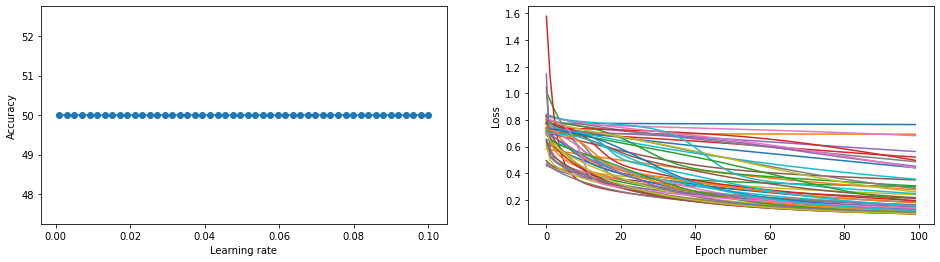

In [10]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learning_rates,acc_by_lr,'o-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()